In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

In [3]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
eyeglasses_classifier =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
smile_calssifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')


135


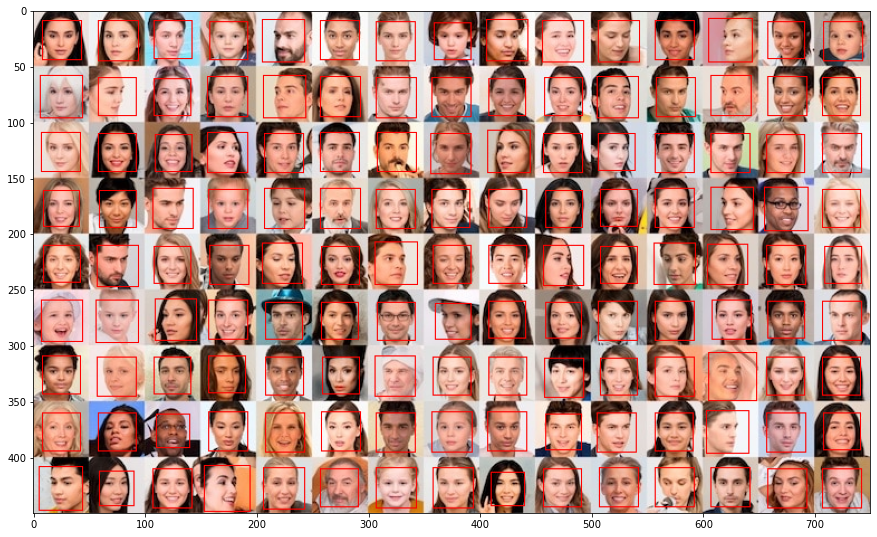

In [4]:
img = cv2.imread('images/faces.jpeg')
gray = cv2.imread('images/faces.jpeg',0)
cascade = cv2.CascadeClassifier( 'haarcascade_frontalface_default.xml')
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.013,minNeighbors = 5,
                                    minSize = (20,20),maxSize=(45,45))
for face in faces:
    x,y,w,h = face
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),1)
print(len(faces))
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])
plt.show()

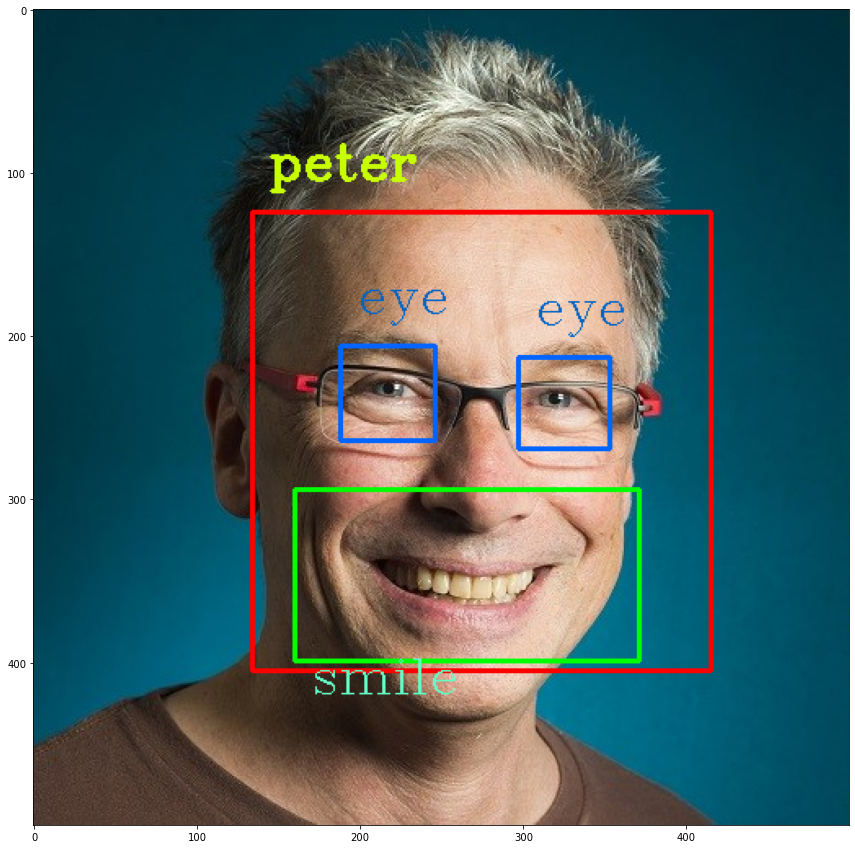

In [5]:
img = cv2.imread('images/peter.jpg')
gray = cv2.imread('images/peter.jpg',0)
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.013,minNeighbors = 5, minSize = (10,10))

#detect faces

for face in faces:
    x,y,w,h = face
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.putText(img,'peter',(x+10,y-20),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,200),2)
    face_gray=gray[ y:y+h , x:x+w ]
    smiles = smile_calssifier.detectMultiScale(face_gray,1.05,2,minSize=(100,100))   
    # detect smile from face 
    for smile in smiles:
        x1,y1,w1,h1 = smile
        cv2.rectangle(img,(x+x1,y+y1),(x+x1+w1,y+y1+h1),(0,255,0),2)
        cv2.putText(img,'smile',(x+x1+10,y+y1+h1+20),cv2.FONT_HERSHEY_COMPLEX,1,(200,255,100),1)
    
    
    eyes = eyeglasses_classifier.detectMultiScale(face_gray,1.05,4,minSize=(50,50)) 
    for eye in eyes:
        x1,y1,w1,h1 = eye
        cv2.rectangle(img,(x+x1,y+y1),(x+x1+w1,y+y1+h1),(255,100,0),2)
        cv2.putText(img,'eye',(x+x1+10,y+y1-20),cv2.FONT_HERSHEY_COMPLEX,1,(200,100,0),1)
        
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,::-1])
plt.show()

In [16]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame= cap.read()
    frame_gray= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(frame_gray,1.013,3,minSize=(100,100))
   
    # -----detect faces--- 
    for face in faces:
        x,y,w,h = face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),1)
        cv2.putText(frame,'me',(x+10,y-20),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

        face_gray=frame_gray[ y:y+h , x:x+w ]
        
        # -----------detect smile from face--------
        smiles = smile_calssifier.detectMultiScale(face_gray,1.025,2,minSize=(70,70))   
        
        for smile in smiles:
            x1,y1,w1,h1 = smile
            cv2.rectangle(frame,(x+x1,y+y1),(x+x1+w1,y+y1+h1),(0,255,0),2)
            cv2.putText(frame,'smile',(x+x1+10,y+y1+h1+20),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)
        
        # -----------detect eyes from face--------
        eyes = eyeglasses_classifier.detectMultiScale(face_gray,1.025,4,minSize=(40,30)) 
        
        for eye in eyes:
            x1,y1,w1,h1 = eye
            cv2.circle(frame, (x+x1+(w1//2) ,y+y1+(h1//2)) ,h1//2,(0,255,255),2 )
            cv2.putText(frame,'eye',(x+x1+10,y+y1-20),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,255),1)
    cv2.imshow('face detection',frame)
    k= cv2.waitKey(1)
    if k== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()